In [1]:
#import libraries
import streamlit as st

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import time, date, datetime

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## A. Import dataset

In [ ]:
def upload_dataset(caption: str) -> pd.DataFrame:
    """Let the user upload a dataset"""

    file = st.file_uploader(caption, type=["csv"])
    if not file:
        st.warning("Please upload a CSV file.")
        return pd.DataFrame()
    data = pd.read_csv(file)
    st.write(f"DataFrame size: {len(data)}")
    file.close()
    st.dataframe(data.head())

    return data

## B1. Pivot In-Pack

### B1. a. Data Wrangling

In [ ]:
# Dashboard
if add_sidebar == 'Pivot':
    st.subheader('Pivot Data Dashboard')
    data=upload_dataset('Upload CSV file')
    
    st.write('Time Range')
    exp_period = st.slider('Choose a time range of completed experiments:',
                           date(2019,1,1), date.today(),
                           value=(date(2020,1,1),date(2021,1,1)),
                           format='YYYY/MM/DD')

**Raw CFU** file is a template. To write a function:
- skiprows=2
- key: 'Batch' col
- features: 'T0','Date','CFU/mL','CFU/g','CV','Water Acitivty' cols
- remove rows with NaN in 'Batch' col
- Change 'Batch' col to 'FD Run ID'

- Change to datetime for "Date, T0"
- Change to float/number for "CFU/mL, CFU/g, CV": fix DIV/0 to NaN

In [28]:
rawcfu_df = pd.read_csv(filepath_or_buffer="Data files/Pivot_CFUs.csv")
rawcfu_df.head()

,"Sparkle PIVOT Sample CFU plating data recording sheet. Manually enter your data in columns marked with a ⭐ (optional: †) and the other columns should auto-calculate appropriately. The data are sortable, and can be filtered using the dropdowns in each column.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,⭐,⭐,†,†,⭐,†,⭐,NaN,⭐,NaN,...,†,NaN,NaN,NaN,NaN,NaN,NaN,†,NaN,NaN
1,Batch,Sample Description,Code No.,Logs,No. Reps,Extra,grams,mL,Who,T0,...,R3,CFU/mL,SD CFU/mL,CFU/g,SD CFU/g,CV,Water Activity,Remark/AW,NaN,NaN
2,FDL-086-7,Pivot FD,NaN,"5, 6, 7",2,NaN,0.1084,2.06,CL,10/12/22,...,NaN,4.28E+09,2.88E+09,8.13E+10,5.48E+10,67.40%,NaN,Contaminated,NaN,NaN
3,FDL-090C-T09,Pivot FD,NaN,"5, 6, 7",2,NaN,0.1029,1.96,CL,10/12/22,...,NaN,1.18E+10,8.49E+08,2.24E+11,1.61E+10,7.20%,NaN,NaN,NaN,NaN
4,FDL-095A-T08,Pivot FD,NaN,"5, 6, 7",2,NaN,0.1083,2.06,CL,10/12/22,...,NaN,2.32E+08,3.96E+07,4.41E+09,7.52E+08,17.10%,NaN,NaN,NaN,NaN


In [29]:
# replace the colmns with the values of the second row
rawcfu_df.columns = rawcfu_df.iloc[1]

# remove the first and second rows
rawcfu_df = rawcfu_df.iloc[2:]

# reset index
rawcfu_df = rawcfu_df.reset_index()

# keep relevant cols
rawcfu_df = rawcfu_df[['Batch','T0','Date','CFU/mL','CFU/g','CV','Water Activity']]

rawcfu_df.head()

1,Batch,T0,Date,CFU/mL,CFU/g,CV,Water Activity
0,FDL-086-7,10/12/22,10/12/22,4.28E+09,8.13E+10,67.40%,NaN
1,FDL-090C-T09,10/12/22,10/12/22,1.18E+10,2.24E+11,7.20%,NaN
2,FDL-095A-T08,10/12/22,4/27/22,2.32E+08,4.41E+09,17.10%,NaN
3,FDL-095-T05,10/12/22,10/12/22,2.00E+06,3.80E+07,141.40%,NaN
4,FDL-92B-T12,10/12/22,10/12/22,1.51E+09,2.87E+10,18.00%,NaN


In [30]:
rawcfu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Batch           774 non-null    object
 1   T0              778 non-null    object
 2   Date            774 non-null    object
 3   CFU/mL          788 non-null    object
 4   CFU/g           780 non-null    object
 5   CV              788 non-null    object
 6   Water Activity  107 non-null    object
dtypes: object(7)
memory usage: 43.2+ KB


<Axes: xlabel='1'>

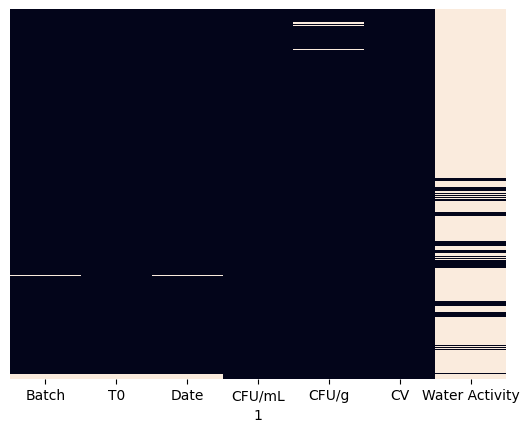

In [31]:
# check NaN values
sns.heatmap(rawcfu_df.isnull(), yticklabels=False, cbar=False)

(774, 7)

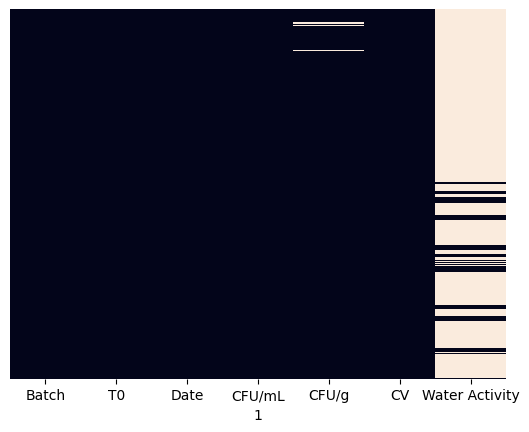

In [32]:
# remove rows with NaN in 'Batch" col
rawcfu_df.dropna(subset=['Batch'],inplace=True)
sns.heatmap(rawcfu_df.isnull(), yticklabels=False, cbar=False)
rawcfu_df.shape

# NaN in CFU/mL or CFU/g indicate either the samples in liq or sol form

In [33]:
rawcfu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 777
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Batch           774 non-null    object
 1   T0              774 non-null    object
 2   Date            774 non-null    object
 3   CFU/mL          774 non-null    object
 4   CFU/g           766 non-null    object
 5   CV              774 non-null    object
 6   Water Activity  107 non-null    object
dtypes: object(7)
memory usage: 48.4+ KB


In [34]:
# convert to datetime for T0 and Date
rawcfu_df[['T0','Date']] = rawcfu_df[['T0','Date']].apply(pd.to_datetime, format="%m/%d/%y")

In [35]:
rawcfu_df.head()

1,Batch,T0,Date,CFU/mL,CFU/g,CV,Water Activity
0,FDL-086-7,2022-10-12,2022-10-12,4.28E+09,8.13E+10,67.40%,NaN
1,FDL-090C-T09,2022-10-12,2022-10-12,1.18E+10,2.24E+11,7.20%,NaN
2,FDL-095A-T08,2022-10-12,2022-04-27,2.32E+08,4.41E+09,17.10%,NaN
3,FDL-095-T05,2022-10-12,2022-10-12,2.00E+06,3.80E+07,141.40%,NaN
4,FDL-92B-T12,2022-10-12,2022-10-12,1.51E+09,2.87E+10,18.00%,NaN


In [36]:
# calculate the time point of plating
## the difference 'Date'-'T0' is a 'timedelta'
rawcfu_df['Time point (day)'] = (rawcfu_df['Date']-rawcfu_df['T0']).apply(lambda x: x.days)
rawcfu_df.head()

1,Batch,T0,Date,CFU/mL,CFU/g,CV,Water Activity,Time point (day)
0,FDL-086-7,2022-10-12,2022-10-12,4.28E+09,8.13E+10,67.40%,NaN,0
1,FDL-090C-T09,2022-10-12,2022-10-12,1.18E+10,2.24E+11,7.20%,NaN,0
2,FDL-095A-T08,2022-10-12,2022-04-27,2.32E+08,4.41E+09,17.10%,NaN,-168
3,FDL-095-T05,2022-10-12,2022-10-12,2.00E+06,3.80E+07,141.40%,NaN,0
4,FDL-92B-T12,2022-10-12,2022-10-12,1.51E+09,2.87E+10,18.00%,NaN,0


In [37]:
# calculate time point in week
## cant' call .days or .week on timedelta. 
## So, I have to convert each dat to week of the year first before calculating the difference
to_week = rawcfu_df[['T0','Date']]

In [38]:
rawcfu_df['Date'].iloc[0].week - rawcfu_df['T0'].iloc[0].week

0

In [39]:
to_week.columns

Index(['T0', 'Date'], dtype='object', name=1)

In [40]:
for i in to_week.columns:
    to_week[i] = to_week[i].apply(lambda x:x.week)

In [41]:
rawcfu_df['Time point (week)'] = to_week['Date'] - to_week['T0']

In [42]:
rawcfu_df.head()

1,Batch,T0,Date,CFU/mL,CFU/g,CV,Water Activity,Time point (day),Time point (week)
0,FDL-086-7,2022-10-12,2022-10-12,4.28E+09,8.13E+10,67.40%,NaN,0,0
1,FDL-090C-T09,2022-10-12,2022-10-12,1.18E+10,2.24E+11,7.20%,NaN,0,0
2,FDL-095A-T08,2022-10-12,2022-04-27,2.32E+08,4.41E+09,17.10%,NaN,-168,-24
3,FDL-095-T05,2022-10-12,2022-10-12,2.00E+06,3.80E+07,141.40%,NaN,0,0
4,FDL-92B-T12,2022-10-12,2022-10-12,1.51E+09,2.87E+10,18.00%,NaN,0,0


In [43]:
# Change data type of CFU/mL 
rawcfu_df['CFU/mL'] = rawcfu_df['CFU/mL'].astype(float)

In [44]:
# invalid values (not scientific) in CFU/g col
rawcfu_df.loc[rawcfu_df['CFU/g'] == '#DIV/0!'].index

Int64Index([ 31,  32,  65,  66,  77, 448, 449, 450, 451, 452,
            ...
            703, 704, 705, 706, 707, 708, 709, 710, 711, 712],
           dtype='int64', length=144)

In [45]:
# replace invalid values with NaN
rawcfu_df['CFU/g'] = rawcfu_df['CFU/g'].replace('#DIV/0!', np.NaN)

In [46]:
# Change data type of CFU/g to float
rawcfu_df['CFU/g'] = rawcfu_df['CFU/g'].astype(float)

In [47]:
# Change data type of CV to float
## convert each value to float without the % sign and ignore invalid values
for idx, row in rawcfu_df.iterrows():
    try:
        rawcfu_df.loc[idx, "CV"] = float(row['CV'].split("%")[0])
    except Exception as e:
        pass

In [48]:
## replace invalid values with NaN
rawcfu_df['CV'] = rawcfu_df['CV'].replace('#DIV/0!', np.NaN)

In [49]:
rawcfu_df

1,Batch,T0,Date,CFU/mL,CFU/g,CV,Water Activity,Time point (day),Time point (week)
0,FDL-086-7,2022-10-12,2022-10-12,4.280000e+09,8.130000e+10,67.4,NaN,0,0
1,FDL-090C-T09,2022-10-12,2022-10-12,1.180000e+10,2.240000e+11,7.2,NaN,0,0
2,FDL-095A-T08,2022-10-12,2022-04-27,2.320000e+08,4.410000e+09,17.1,NaN,-168,-24
3,FDL-095-T05,2022-10-12,2022-10-12,2.000000e+06,3.800000e+07,141.4,NaN,0,0
4,FDL-92B-T12,2022-10-12,2022-10-12,1.510000e+09,2.870000e+10,18.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...
773,EDKOKO02222302,2022-10-12,2023-04-07,3.560000e+08,6.760000e+09,13.2,NaN,177,-27
774,FDL-105K-T42,2022-10-12,2023-04-07,4.030000e+08,7.650000e+09,10.3,NaN,177,-27
775,FDL-105K-T44,2022-10-12,2023-04-07,1.130000e+08,2.150000e+09,1.7,NaN,177,-27
776,FDL-105EF-T24 TMC1,2022-10-12,2023-04-07,1.570000e+09,2.990000e+10,4.8,0.298,177,-27


<Axes: xlabel='1'>

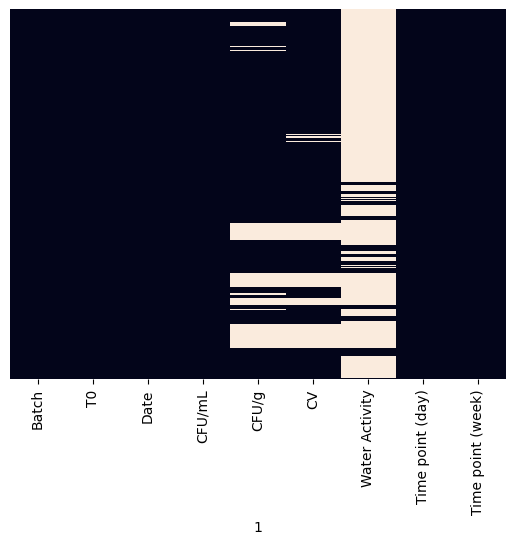

In [50]:
sns.heatmap(rawcfu_df.isnull(), yticklabels=False, cbar=False)

In [51]:
rawcfu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 777
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Batch              774 non-null    object        
 1   T0                 774 non-null    datetime64[ns]
 2   Date               774 non-null    datetime64[ns]
 3   CFU/mL             774 non-null    float64       
 4   CFU/g              622 non-null    float64       
 5   CV                 631 non-null    float64       
 6   Water Activity     107 non-null    object        
 7   Time point (day)   774 non-null    int64         
 8   Time point (week)  774 non-null    int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 76.6+ KB


In [52]:
# Change Water Activity to float
rawcfu_df['Water Activity'] = rawcfu_df['Water Activity'].astype(float)

In [53]:
# Change col names
rawcfu_df.rename(columns={'Batch':'FD Run ID', 'CV':'CV (%)'}, inplace=True)
rawcfu_df.head()

1,FD Run ID,T0,Date,CFU/mL,CFU/g,CV (%),Water Activity,Time point (day),Time point (week)
0,FDL-086-7,2022-10-12,2022-10-12,4.280000e+09,8.130000e+10,67.4,NaN,0,0
1,FDL-090C-T09,2022-10-12,2022-10-12,1.180000e+10,2.240000e+11,7.2,NaN,0,0
2,FDL-095A-T08,2022-10-12,2022-04-27,2.320000e+08,4.410000e+09,17.1,NaN,-168,-24
3,FDL-095-T05,2022-10-12,2022-10-12,2.000000e+06,3.800000e+07,141.4,NaN,0,0
4,FDL-92B-T12,2022-10-12,2022-10-12,1.510000e+09,2.870000e+10,18.0,NaN,0,0


In [54]:
rawcfu_df.describe()

1,CFU/mL,CFU/g,CV (%),Water Activity,Time point (day),Time point (week)
count,7.740000e+02,6.220000e+02,631.000000,107.000000,774.000000,774.000000
mean,2.223758e+10,4.480233e+11,13.750238,0.267308,77.231266,-15.886305
std,8.401675e+10,1.478080e+12,18.847934,0.057901,52.325477,19.959078
min,0.000000e+00,0.000000e+00,0.000000,0.116000,-168.000000,-40.000000
25%,1.210000e+06,1.880000e+09,4.700000,0.227000,36.000000,-35.000000
50%,1.160000e+09,4.100000e+10,8.600000,0.270000,84.500000,-27.000000
75%,7.960000e+09,2.320000e+11,16.100000,0.305000,119.000000,5.000000
max,1.210000e+12,1.090000e+13,173.200000,0.405000,177.000000,10.000000


**Data cleaning steps for Pivot In-pack**

In [ ]:
# import the dataset 
rawcfu_df=upload_dataset('Upload Raw CFU .csv file')

# replace the colmns with the values of the second row
rawcfu_df.columns = rawcfu_df.iloc[1]
# remove the first and second rows
rawcfu_df = rawcfu_df.iloc[2:]
# reset index
rawcfu_df = rawcfu_df.reset_index()
# keep relevant cols
rawcfu_df = rawcfu_df[['Batch','T0','Date','CFU/mL','CFU/g','CV','Water Activity']]
# remove rows with NaN in 'Batch" col
rawcfu_df.dropna(subset=['Batch'],inplace=True)


# convert to datetime for T0 and Date
rawcfu_df[['T0','Date']] = rawcfu_df[['T0','Date']].apply(pd.to_datetime, format="%m/%d/%y")

# calculate the time point of plating
## by days
rawcfu_df['Time point (day)'] = (rawcfu_df['Date']-rawcfu_df['T0']).apply(lambda x: x.days)
## by weeks
to_week = rawcfu_df[['T0','Date']]
for i in to_week.columns:
    to_week[i] = to_week[i].apply(lambda x:x.week)
rawcfu_df['Time point (week)'] = to_week['Date'] - to_week['T0']    

# remove percentage sign for CV values while ignoring invalid values
for idx, row in rawcfu_df.iterrows():
    try:
        rawcfu_df.loc[idx, "CV"] = float(row['CV'].split("%")[0])
    except Exception as e:
        pass

# handle invalid values and change to float
to_float = [['CFU/mL','CFU/g','CV','Water Activity']]
for col in to_float.columns:
    rawcfu_df[col] = rawcfu_df[col].replace('#DIV/0!', np.NaN)
    rawcfu_df[col] = rawcfu_df[col].astype(float)
    
    
# Change col names
rawcfu_df.rename(columns={'Batch':'FD Run ID', 'CV':'CV (%)'}, inplace=True)

In [48]:
def upload_dataset(caption: str) -> pd.Datastypee:
    """
    Let the user upload a dataset as CSV then cleans up the file contents.
    
    INPUT: a .csv file set in a template
    
    OUTPUT: a clean dataframe with relevant info
    """

    file = st.file_uploader(caption, type=["csv"])
    if not file:
        st.warning("Please upload a CSV file.")
        return pd.DataFrame()
    
    # read in the template and select relevant information
    data = pd.read_csv(file, skiprows=2)
    data = data[['Batch','Date','CFU/mL','CFU/g']]
    data.dropna(subset=['Batch'],inplace=True)

    st.write(f"DataFrame size: {len(data)}")
    file.close()
    st.dataframe(data.head())

    return data

### B2. Boost

In [ ]:
if add_sidebar == 'Boost':
    st.subheader('Boost Data Dashboard')
    data=upload_dataset('Upload CSV file')
    
    st.write('Time Range')
    exp_period = st.slider('Choose a time range of completed experiments:',
                           date(2019,1,1), date.today(),
                           value=(date(2020,1,1),date(2021,1,1)),
                           format='YYYY/MM/DD')
    
    
                                  
    #data preprocessing
    #features engineering 